In [1]:
# -*- coding: utf-8 -*-
# !/usr/bin/python
# Cross Wavelet Analysis (CWA) based on Maraun and Kurths(2004).
# http://www.nonlin-processes-geophys.net/11/505/2004/npg-11-505-2004.pdf
# author: Mabel Calim Costa
# INPE
# 23/01/2013
# reviewed --- 02/03/2018
"""
Created on Mon Jun 17 2013

@author: Mabel Calim Costa
"""
import numpy as np
import pylab
from pylab import *
import matplotlib.pyplot as plt
import cmath
import pandas as pd

# Now, let's create an artificial signal to test it!

* create a time series X   (sine) 
* create a time series Y   (cosine) = out of phase sine 


Nr of Scales: 80
scales [2.0, 2.1810154653305154, 2.378414230005442, 2.5936791093020193, 2.8284271247461903, 3.0844216508158815, 3.363585661014858, 3.668016172818685, 4.0, 4.362030930661031, 4.756828460010884, 5.187358218604039, 5.656854249492381, 6.168843301631763, 6.727171322029716, 7.33603234563737, 8.0, 8.724061861322062, 9.513656920021768, 10.374716437208077, 11.313708498984761, 12.337686603263526, 13.454342644059432, 14.67206469127474, 16.0, 17.448123722644123, 19.027313840043536, 20.749432874416154, 22.627416997969522, 24.675373206527052, 26.908685288118864, 29.34412938254948, 32.0, 34.896247445288246, 38.05462768008707, 41.49886574883231, 45.254833995939045, 49.350746413054104, 53.81737057623773, 58.68825876509896, 64.0, 69.79249489057649, 76.10925536017415, 82.99773149766462, 90.50966799187809, 98.70149282610821, 107.63474115247546, 117.37651753019792, 128.0, 139.58498978115298, 152.2185107203483, 165.99546299532923, 181.01933598375618, 197.40298565221642, 215.2694823049509, 2

/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:614: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_over('yellow')
/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:615: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_under('cyan')
/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:616: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, yo

{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <AxesSubplot:title={'center':'x'}, ylabel='Amplitude'>,
 'ax_cwt': <AxesSubplot:xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <AxesSubplot:title={'center':'$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <AxesSubplot:title={'center':'Global Wavelet Spectrum'}, xlabel='Power'>}

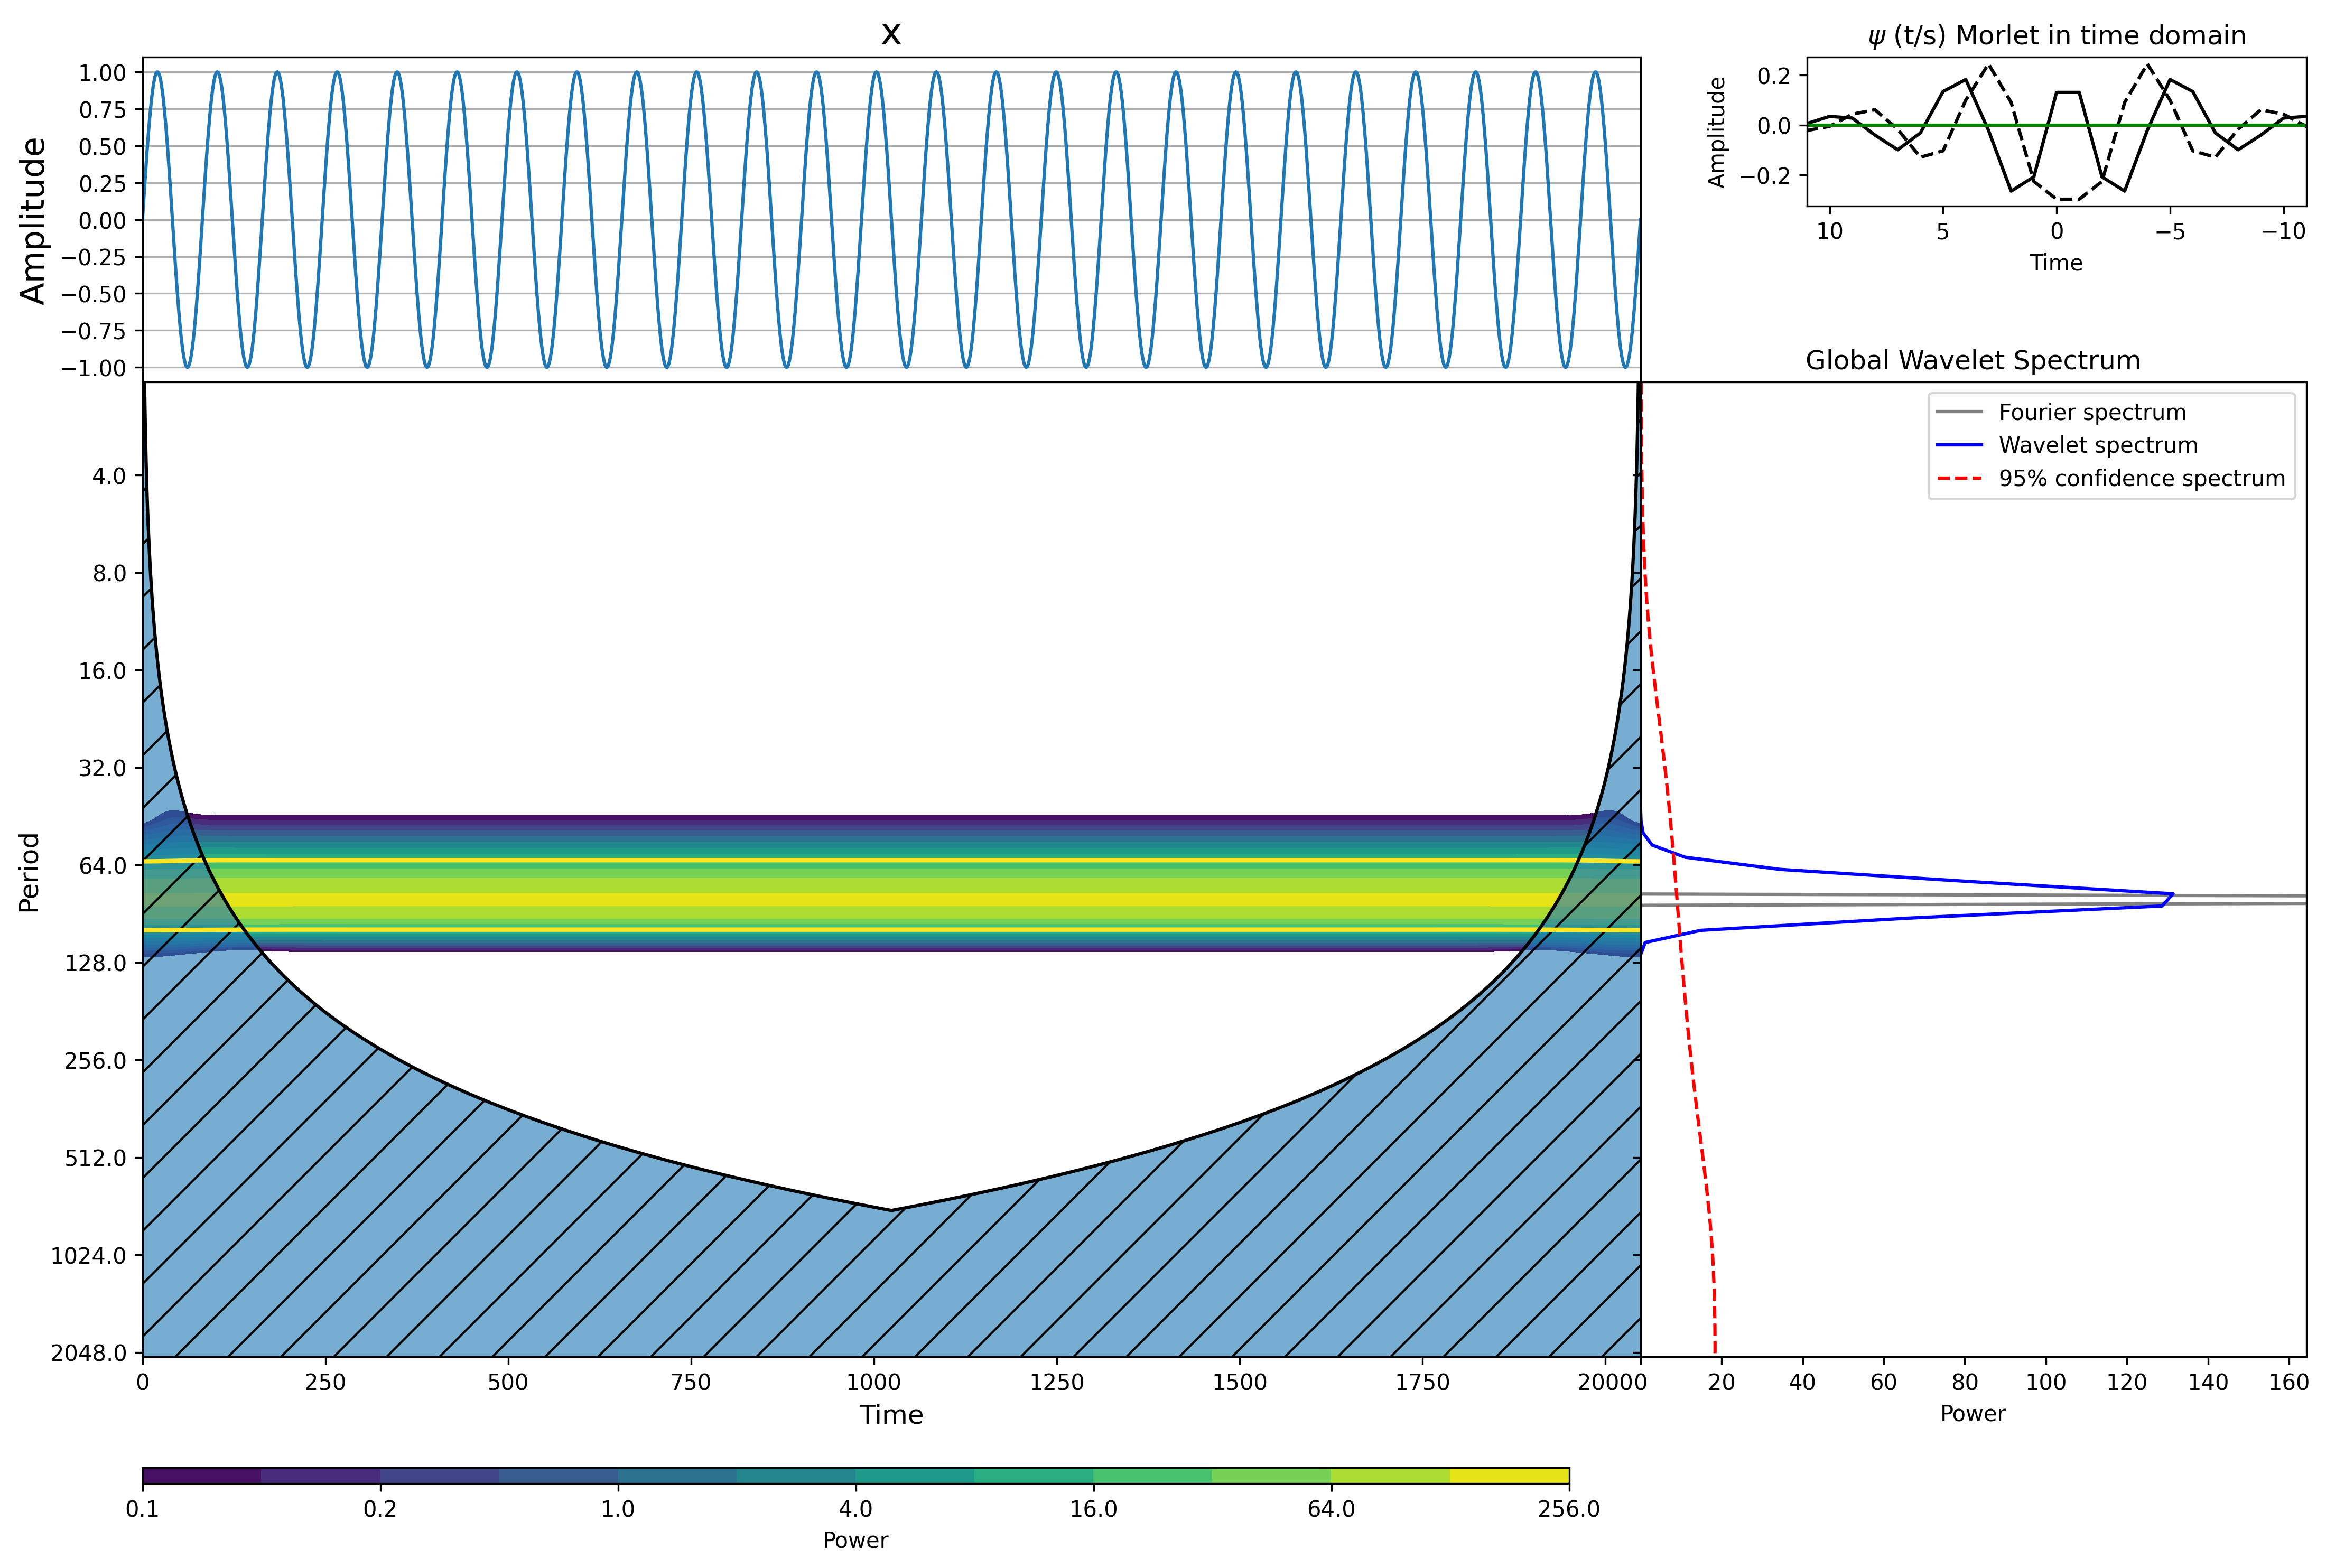

In [7]:
# using the example : example_python3.6.ipynb
import numpy as np
from pylab import *
import waipy
z = np.linspace(0,2048,2048)
x = np.sin(50*np.pi*z)

data_norm_x = waipy.normalize(x)

dt =1
pad = 1         # pad the time series with zeroes (recommended)
dj = 0.125       # this will do 4 sub-octaves per octave
s0 = 2*dt       # this says start at a scale of 6 months if dt =annual
j1 = 4/dj       # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72     # lag-1 autocorrelation for red noise background
param = 6
mother = 'Morlet'
dtmin = 0.25/8    # dt/n of suboctaves

result_x = waipy.cwt(data_norm_x, dt, pad, dj, s0, j1, lag1, param,mother='Morlet',name='x')
waipy.wavelet_plot('x', z, x, dtmin, result_x)

Nr of Scales: 80
scales [2.0, 2.1810154653305154, 2.378414230005442, 2.5936791093020193, 2.8284271247461903, 3.0844216508158815, 3.363585661014858, 3.668016172818685, 4.0, 4.362030930661031, 4.756828460010884, 5.187358218604039, 5.656854249492381, 6.168843301631763, 6.727171322029716, 7.33603234563737, 8.0, 8.724061861322062, 9.513656920021768, 10.374716437208077, 11.313708498984761, 12.337686603263526, 13.454342644059432, 14.67206469127474, 16.0, 17.448123722644123, 19.027313840043536, 20.749432874416154, 22.627416997969522, 24.675373206527052, 26.908685288118864, 29.34412938254948, 32.0, 34.896247445288246, 38.05462768008707, 41.49886574883231, 45.254833995939045, 49.350746413054104, 53.81737057623773, 58.68825876509896, 64.0, 69.79249489057649, 76.10925536017415, 82.99773149766462, 90.50966799187809, 98.70149282610821, 107.63474115247546, 117.37651753019792, 128.0, 139.58498978115298, 152.2185107203483, 165.99546299532923, 181.01933598375618, 197.40298565221642, 215.2694823049509, 2

/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:614: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_over('yellow')
/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:615: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_under('cyan')
/Library/Python/3.8/site-packages/waipy-0.0.1.50-py3.8.egg/waipy/cwt/wavetest.py:616: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, yo

{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <AxesSubplot:title={'center':'y'}, ylabel='Amplitude'>,
 'ax_cwt': <AxesSubplot:xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <AxesSubplot:title={'center':'$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <AxesSubplot:title={'center':'Global Wavelet Spectrum'}, xlabel='Power'>}

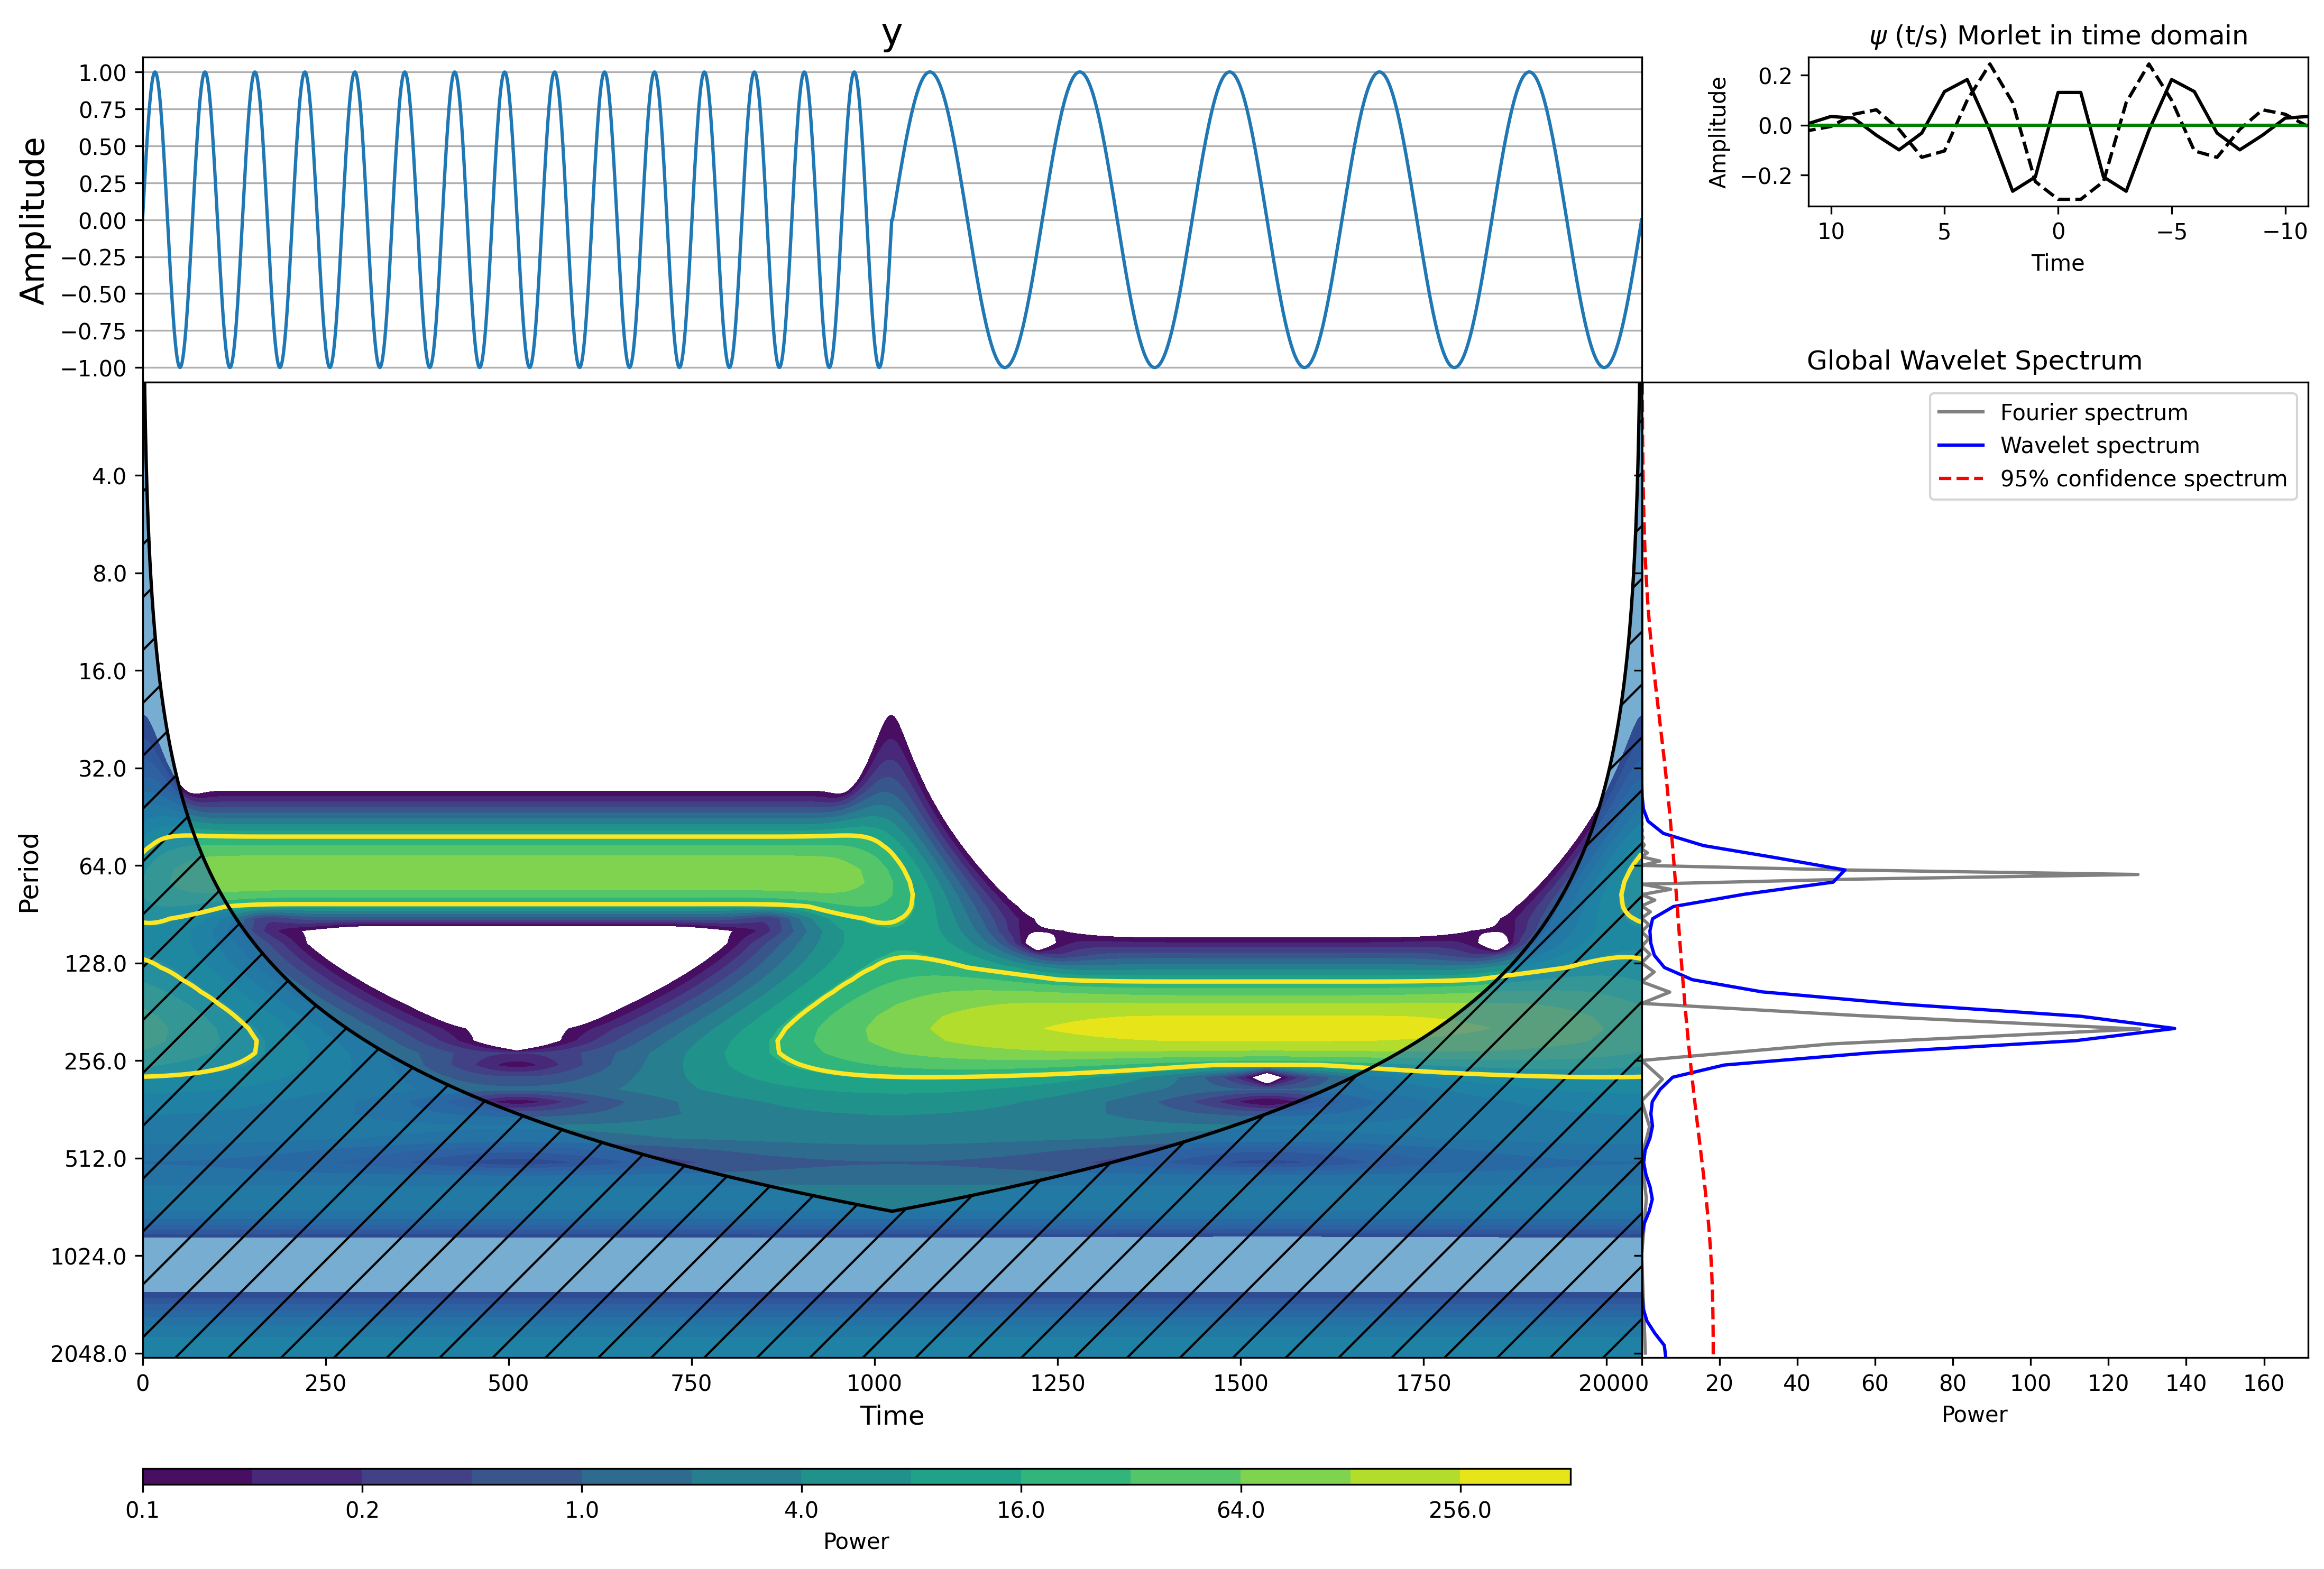

In [8]:
#let's create another artificial signal to compare with that!
z2 = np.linspace(0,1024,1024)
y = np.concatenate((np.sin(30*np.pi*z2),np.sin(10*np.pi*z2)),axis=0)
data_norm_y = waipy.normalize(y)
result_y = waipy.cwt(data_norm_y,  dt, pad, dj, s0, j1, lag1, param,mother='Morlet',name='x')
waipy.wavelet_plot('y', z, y, dtmin, result_y)


# Let's check the cross power wavelet spectrum!

* note that arrows indicate in phase when pointing to the right and out of phase when pointing left.

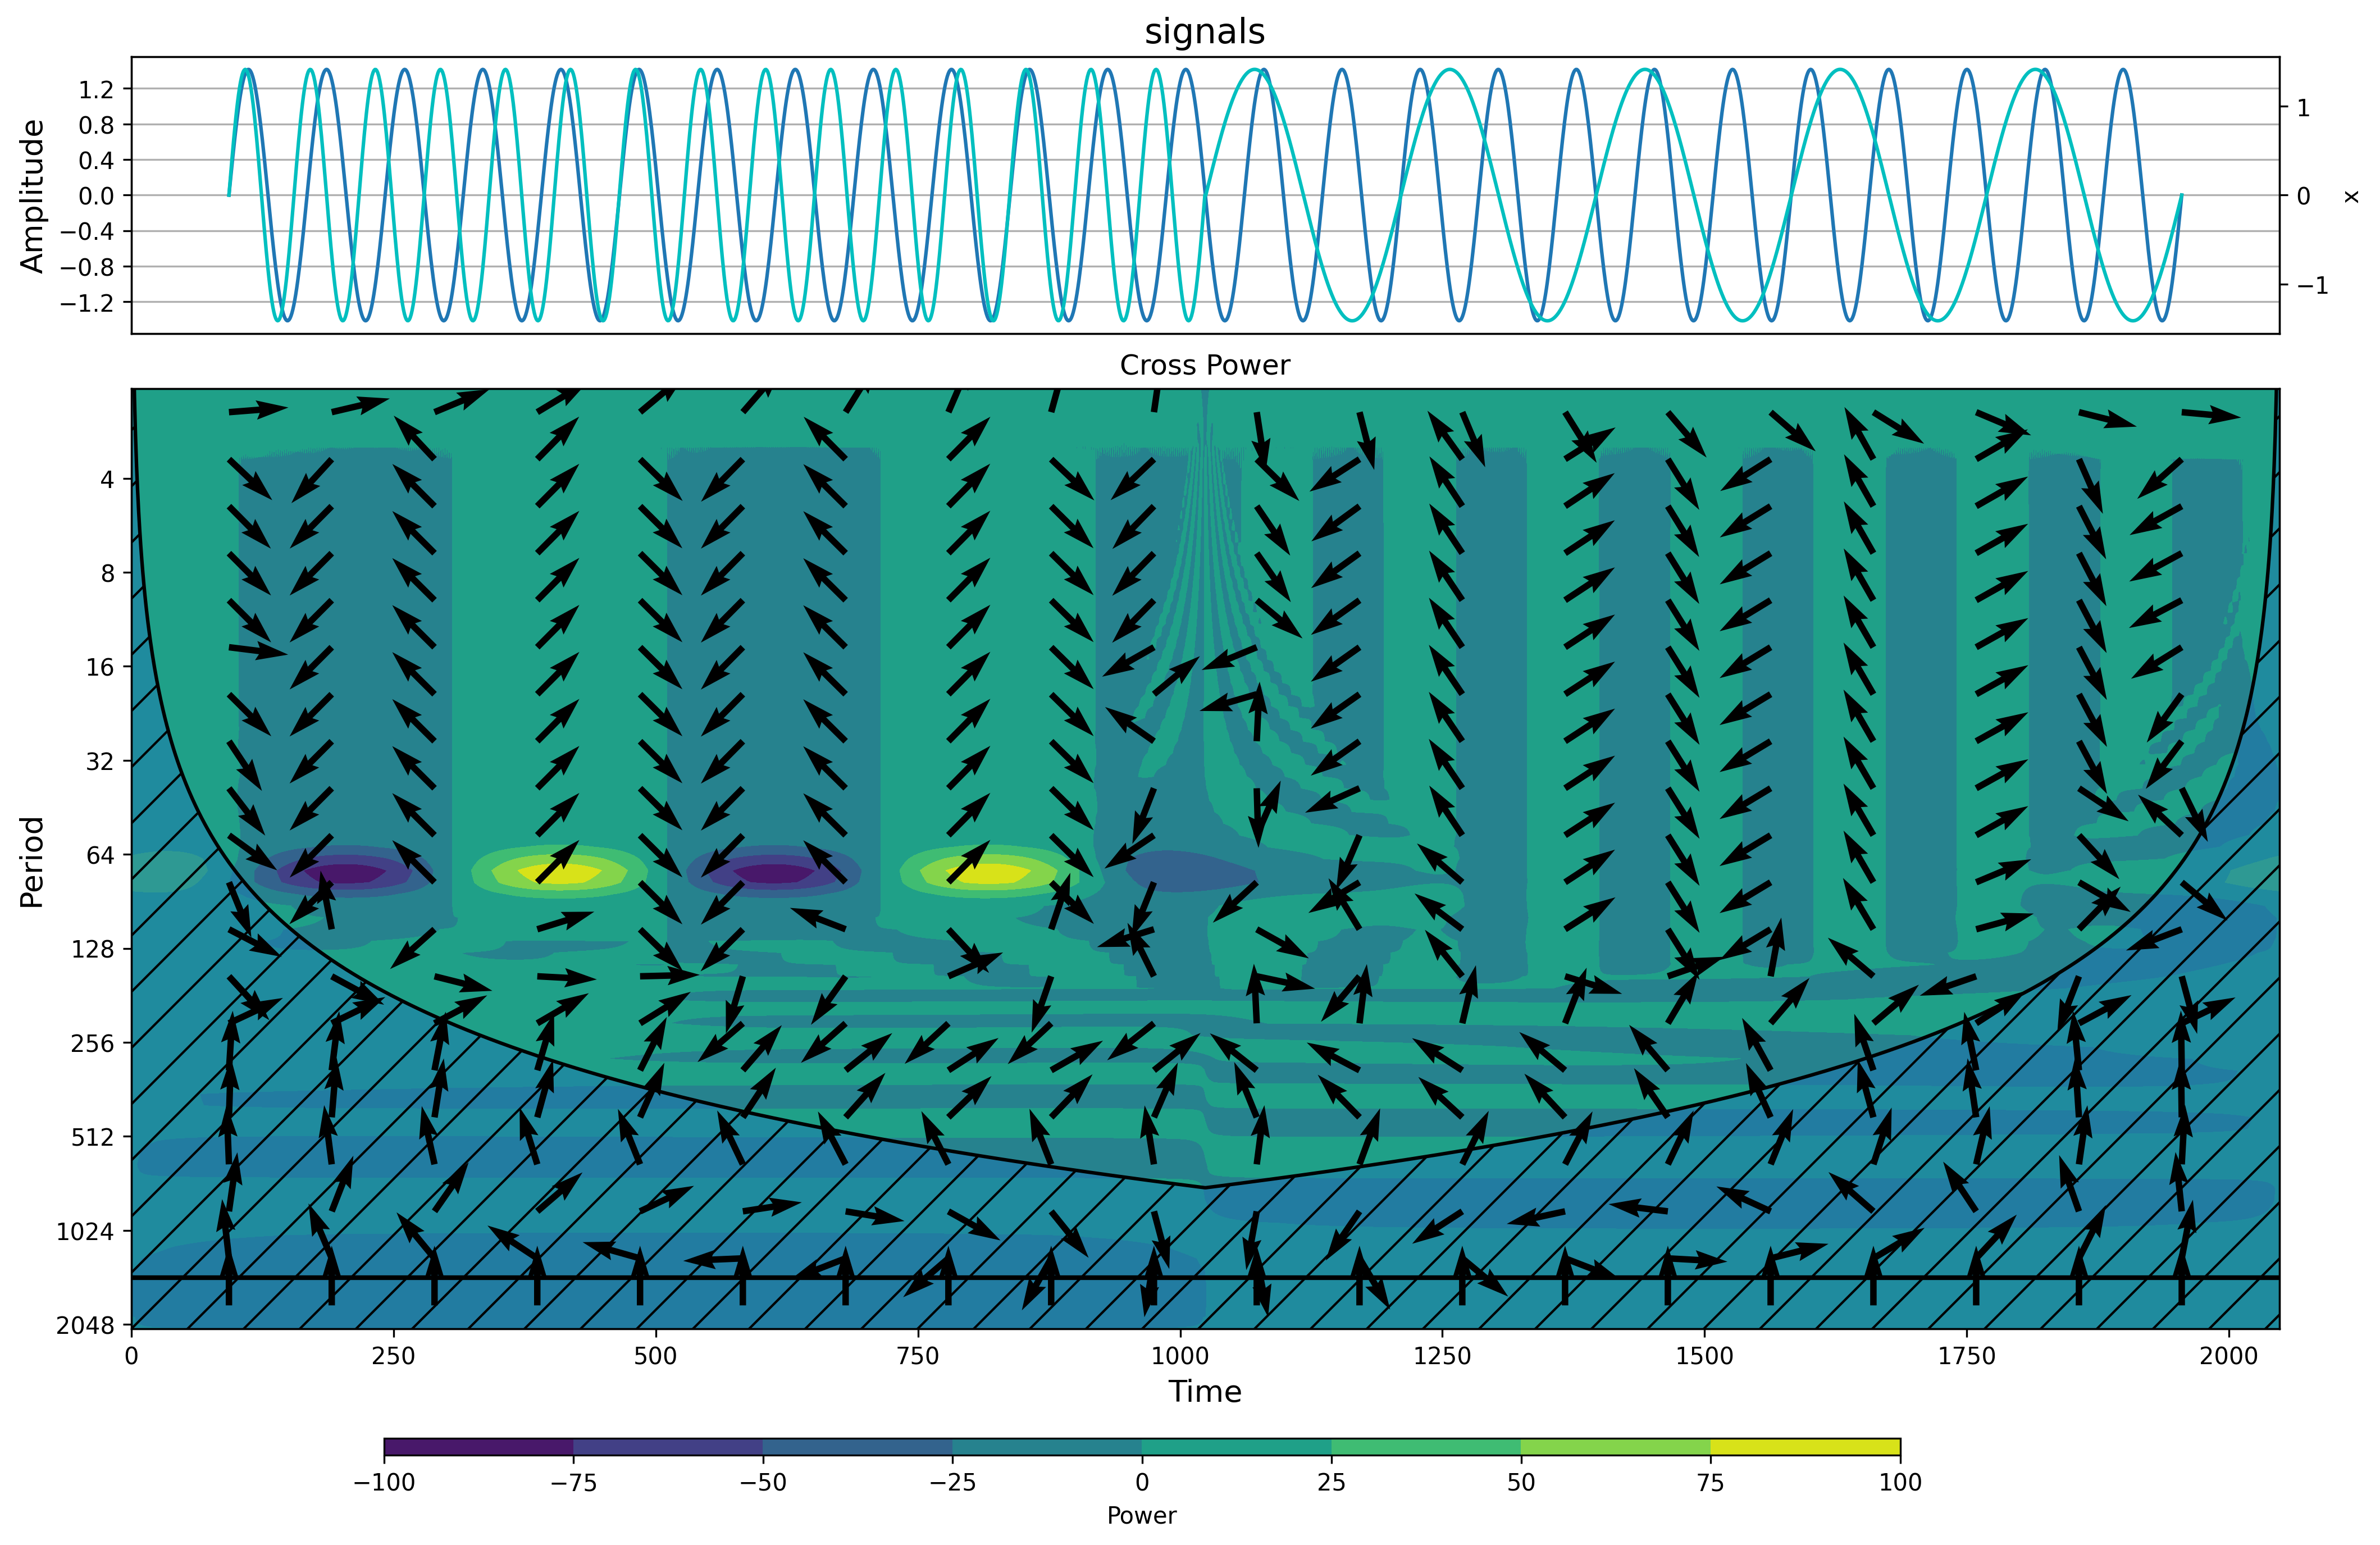

In [9]:
WPS12, coherence, phase_angle,cross_power = waipy.cross_wavelet(result_x['wave'],result_y['wave'])
figname = 'cp_freqchange.png'
waipy.plot_cross('signals', cross_power, phase_angle, z, result_x, result_y,figname)
#Arrows indicate in phase when pointing to the right and out of phase when pointing left.

# Now let's view the wavelet coherence analysis

## for X and Y signals

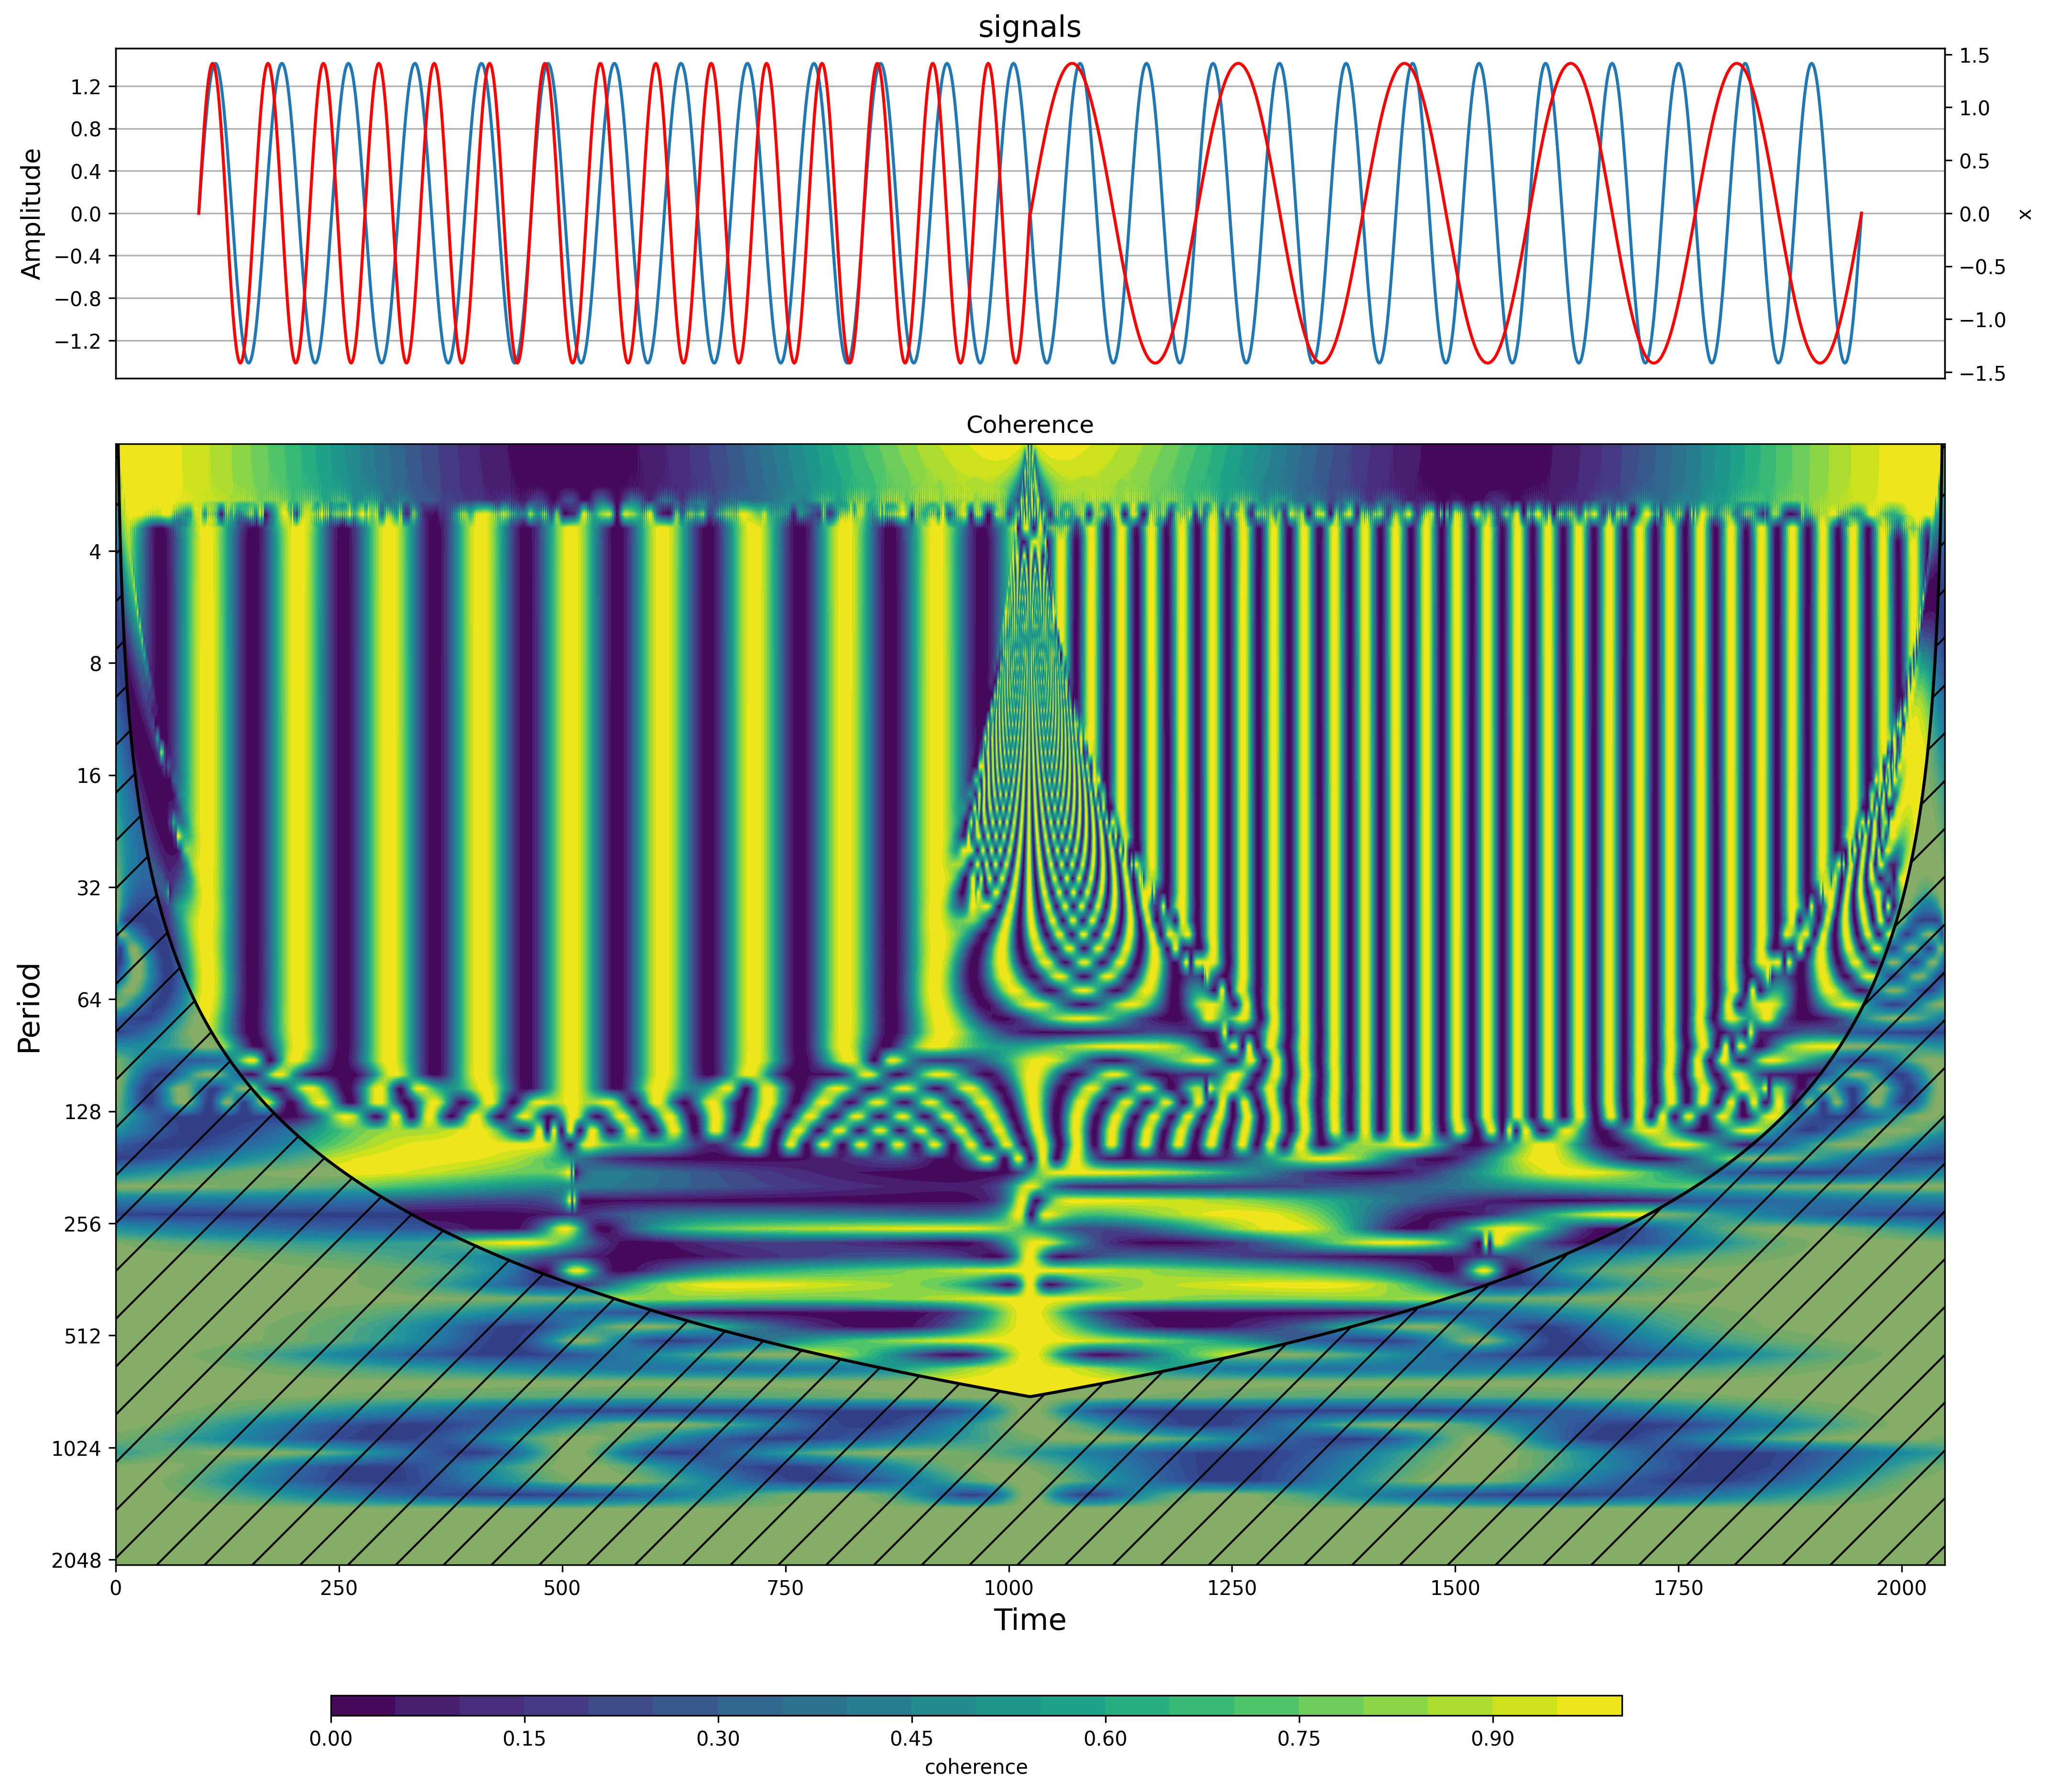

In [10]:
WPS12, coherence, phase_angle, cross_power= waipy.cross_wavelet(result_x['wave'],result_y['wave'])

figname = 'cohere_freqchange.png'
waipy.plot_cohere('signals',coherence,z,result_x, result_y,figname)